<h1 align="center">Credit Card Fraud Detection</h1> 
_____________________________________________________________________________________________________

<h5 align="center">Luis Terán</h5> 

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The aim of this project is to create a model that is able to identify whether a transaction is fraudulent or not. Special emphasis is made to detect all the fraudulent transactions.

<img src="images/fraud.jpg" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">Fraud detection</p>

For this project the dataset was obtained from:

</br><center> https://www.kaggle.com/mlg-ulb/creditcardfraud </center>

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data cannot be provided. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction.

The process followed by the project was:
1. Exploratory Data Analysis 
2. Baseline Model
3. Handling Imbalanced Dataset
4. Model Building
5. ROC Curve
6. Adjusting probability threshold

**Terminar de rellenar esta parte**

## 1. Exploratory Data Analysis

First of all, we need to import the complete dataset and take a view of the data. It is a 31 column dataset with 284807 transactions made with no label for the columns. Only the amount and time after a transaction are available. Also, a scaling is made because of the difference in magnitudes, specially in the labeled cases (time & amount).

In [1]:
# All the libraries needed for the project are loaded
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

np.random.seed(0)
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns', None)

In [2]:
# The dataset is imported
data = pd.read_csv('./data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Number of rows and columns
data.shape

(284807, 31)

In [4]:
# Scaling is made because of the difference of magnitudes
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df = pd.DataFrame(scaler.fit_transform(data.iloc[:,:-1]), columns=data.columns[:-1])

### 1.1 Prediction label Analysis

Then, we will analyze the target value that corresponds for this case to the "Class" column. The column contains values of 0 if the transaction is not fraudulent and 1 if the it's a fraud transaction. 

|         Class        | Value |
|:--------------------:|:-----:|
| Harmless transaction |   0   |
|  Fraud transaction  |   1   |
|                      |       |

As we see, there are a lot more not fraud transactions than fraud transactions. Since most of the transactions are made by the authentic user we expected a bigger number of not fraudulent transactions. On the other hand, there is an abysmal gap of difference between not-fraud/fraud proportions. This represents a problem because introduce bias towards the not fraudulent transactions. The proportion in percentage for both classes is:

|         Class        | Percentage |
|:--------------------:|:-----:|
| Harmless transaction |   99.8%   |
|  Fraud transaction  |   0.2%   |
|                      |       |

We also performed some descriptive statistics, but since most of the data are 0 values all the statistic values are also 0 or really close to 0, such as the mean, standard deviation, median and first and third quartile.

In [5]:
# Frequency of accepted and declined transactions
data['Class'].value_counts().to_frame()

,Class
0,284315
1,492


In [6]:
# Getting descriptive statistics from the Class column
data['Class'].describe().to_frame()

,Class
count,284807.000000
mean,0.001727
std,0.041527
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


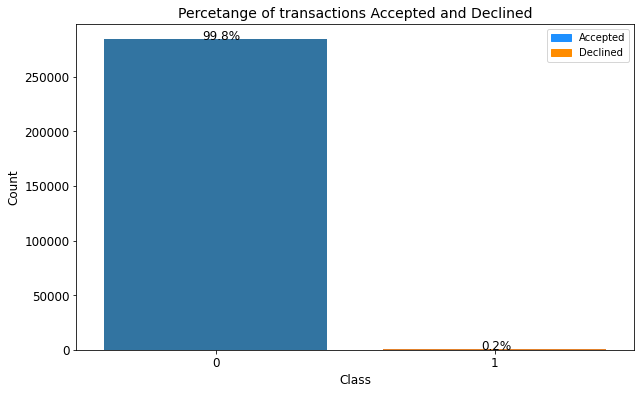

In [7]:
# Percentage proportion plot of Class column
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='Class', data=data)
plt.xticks(size=12)
plt.xlabel('Class', size=12)
plt.yticks(size=12)
plt.ylabel('Count', size=12)
plt.title('Percetange of transactions Accepted and Declined', size=14)
colors = {'Accepted':'dodgerblue', 'Declined':'darkorange'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
without_hue(ax, data.Class)

### 1.2 Feature Analysis

#### 1.2.1 & 1.2.2 Missing values & Data distribution

For the feature analysis, for each column an inspection was made looking for missing values and corresponding data distributions. No missing values were found across the entire dataset. On top of that, from probability distributions we found out that most of the features follow a gaussian distribution with outliers causing a wide range of values. Outliers could be removed to improve the performance of the model, since we dont know exactly what does every feature represents ans its importance, we didnt remove any of these type of values. Any log transformation was performed since most of the features are gaussian distributed. 

#### 1.2.3 Time and Amount Feature Analysis
In comparison, from the labeled features we can extract some additional information:
<ul>
  <li>Time between transactions: Consists in a bimodal distribution, the first mode is between 11 - 12 hours (4,000 - 8,000 seconds) and the second one between 35 - 47 hours (125,000 - 170,000 seconds). With particular emphasis in fraudulent transactions, the most frequent time between transactions is some number between 11 and 13 hours (40,000 - 5,000 seconds). Transactions later than 27 hours (100,000 seconds) are not as common as seen in the second mode.</li>
  <li>Amount spent: The amount spent is an skewed to the right distribution. As we can see from the plots, the vast majority of transactions have a value of less than \$100. The amount spent for fraudulent and not fraudulent transactions is similar but there is a slight increase in fraud transactions, accordingly to the proportions of data, for values above \$100. Nevertheless, usually the amount spent in fraud transactions the less than $1,000</li>  
</ul>

#### 1.2.4 Most significant features analysis

Since there are a lot of columns and its hard to understand the relationship between all the variables together, and for keeping the analysis simple and easy to understand, we can analyze only the most significant columns.We will do so by performing a Lasso regression, which is really similar to linear regression but a penalization is made to get 0 coefficient values. From this we got that the most significant variables are:

| Significant variables |
|:---------------------:|
|           V3          |
|          V10          |
|          V12          |
|          V14          |
|          V16          |
|          V17          |

From the correlation matrix we can state that all these variables are independent from each other and they are only correlated to the independent variable ("Class") with a negative value. This means, as these values of the feature gets bigger the most probable it id to the transaction to be not fraudulent.

Finally, the component by component plot gives us a lot more information about the data. Some conclusions we can make about the plot, the most important ones are:

- From the separated Class distribution of the components (Diagonal plots) we can see that for the not fraudulent cases the values range is really narrow, meanwhile the fraud transactions have a wide range. This pattern repeats along all of the most significant variables. 
- From the scatterplots (Not diagonal plots) we realize that all fraud and not fraud values overlap together for the most cases, specially the fraudulent values overlap the not fraudulent ones so it will be harder to detect fraud transactions compared to not fraudulent transactions.
- From the Class comparison plots (Last column plots) we can state that in general, the not fraudulent transactions tend to have higher values for each feature. This is consistent to what we concluded from the correlation matrix.

This gives us a first idea on how to solve the problem, since the data is so compressed it will be hard to split the classification values with straight lines (Logistic Regression), but we can classify the values defining in a better way defining a range for values, and those values within the range can be classified as not fraudulent. We'll talk about that for Model Building section.

 #### 1.2.1 Missing values

In [8]:
# General information of the dataframe with special emphasis in null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

#### 1.2.2 Data distribution

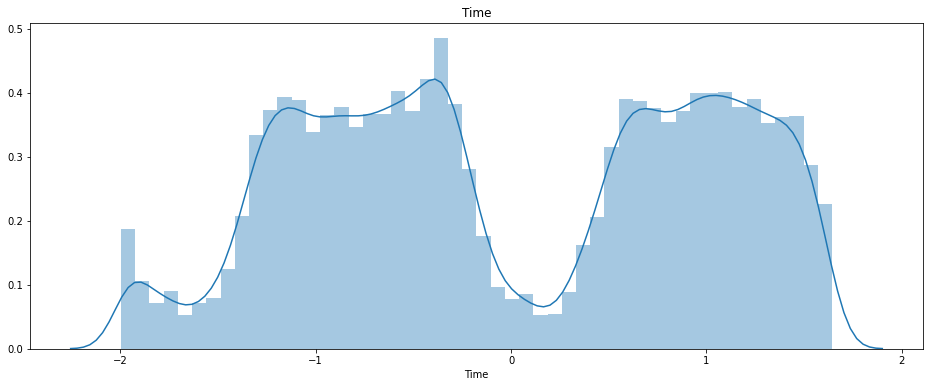

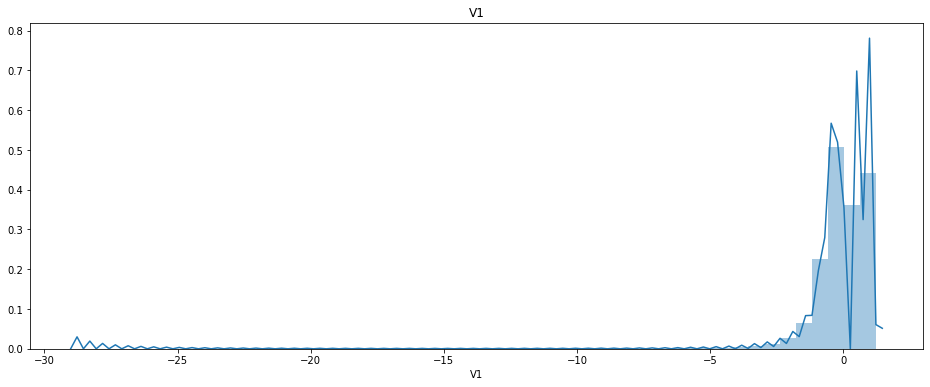

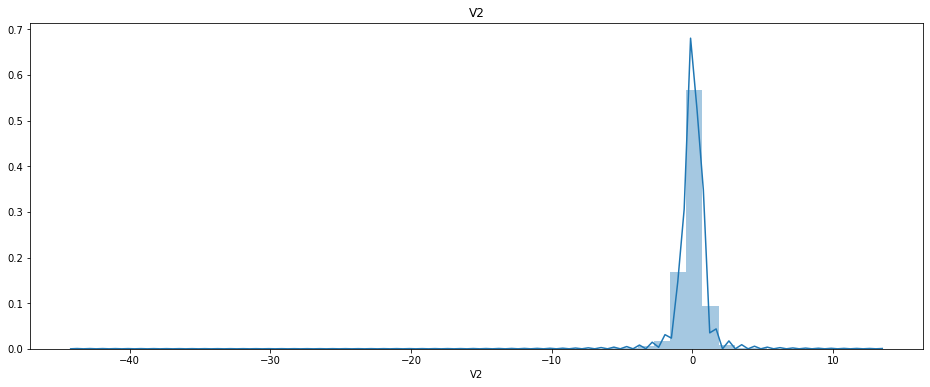

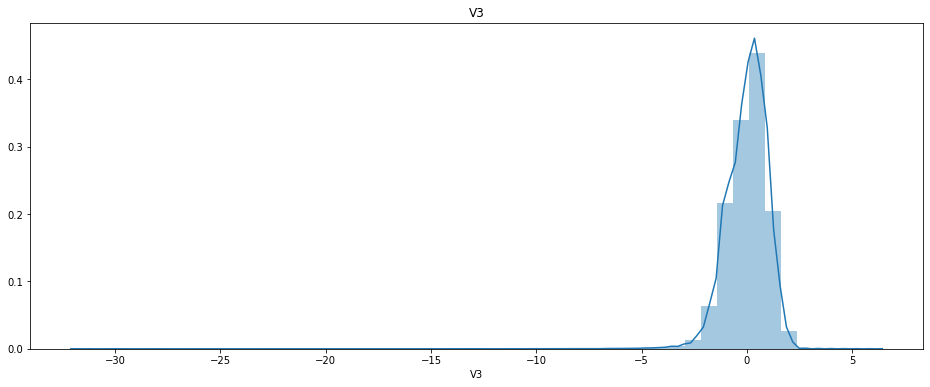

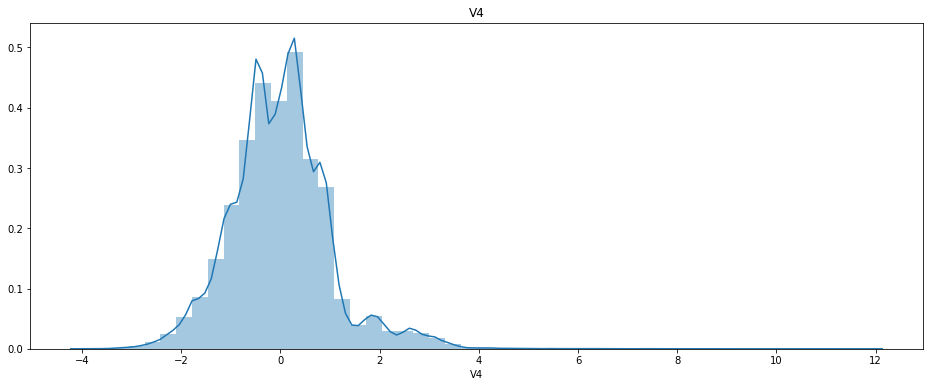

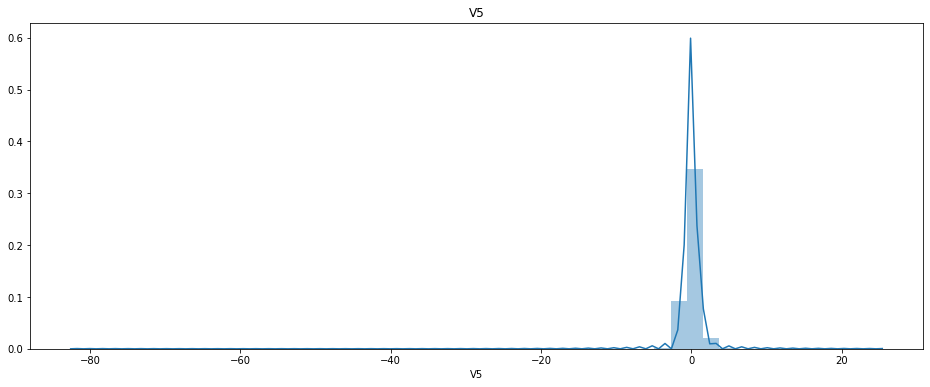

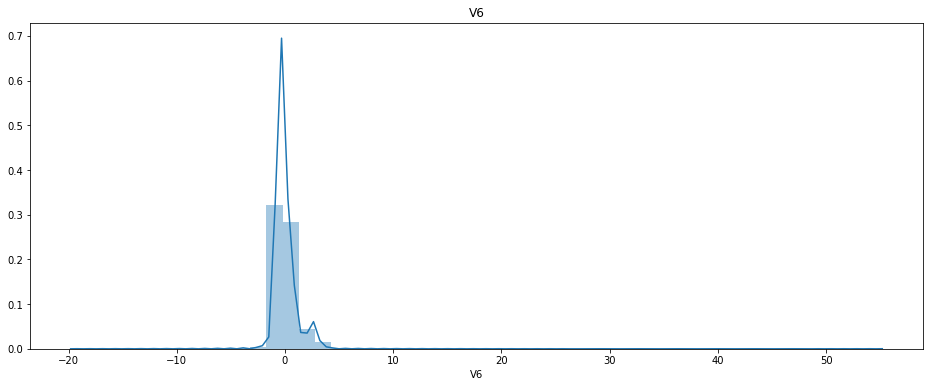

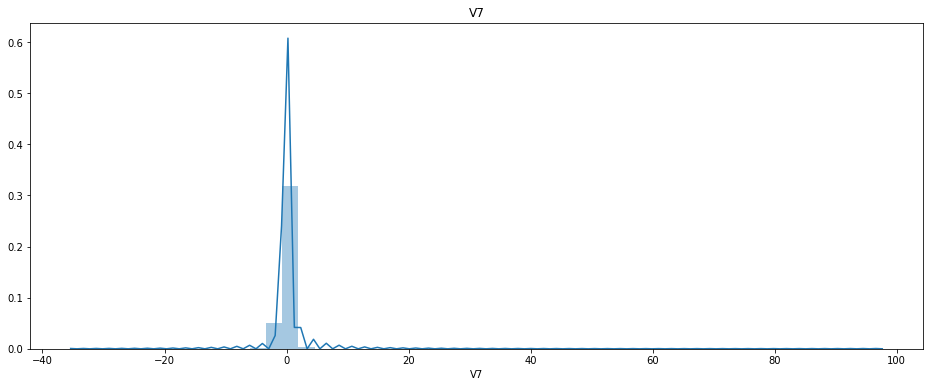

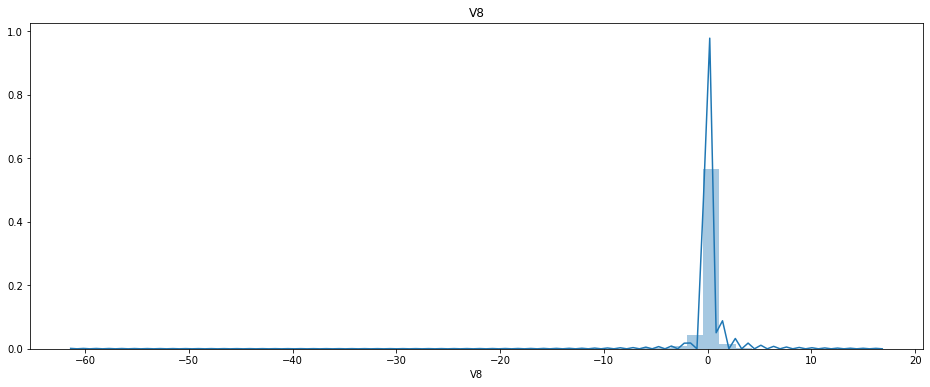

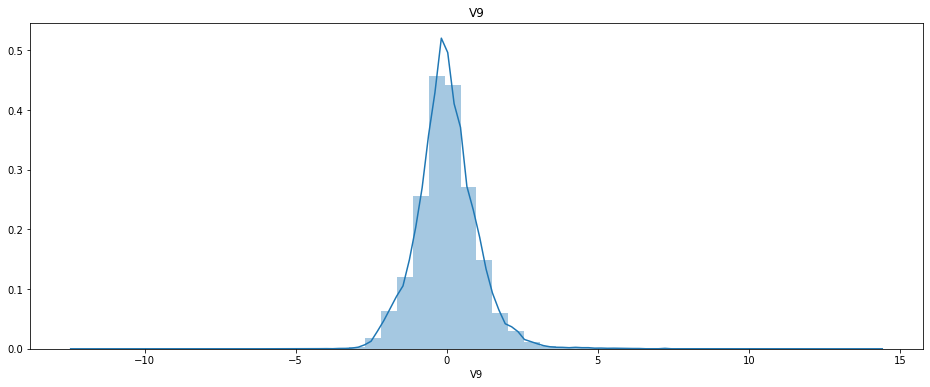

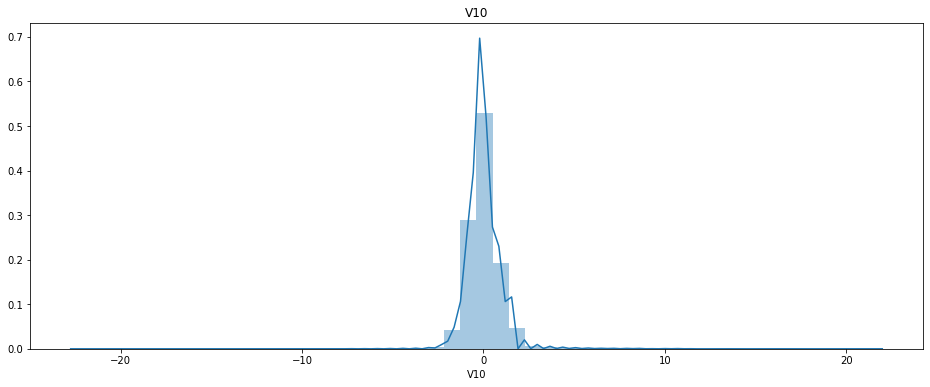

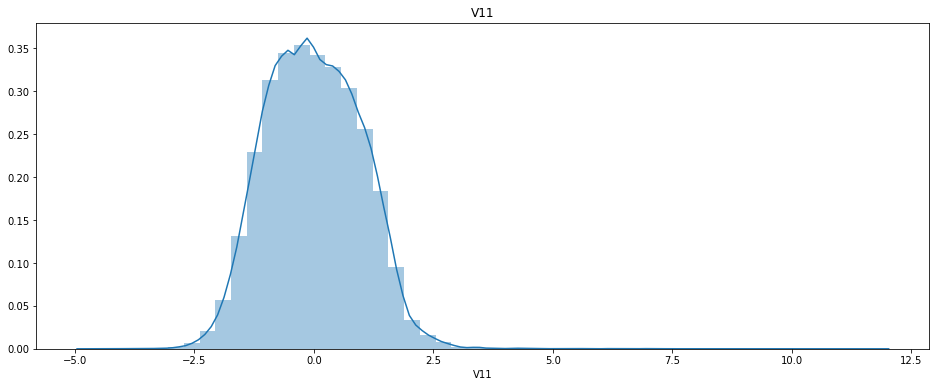

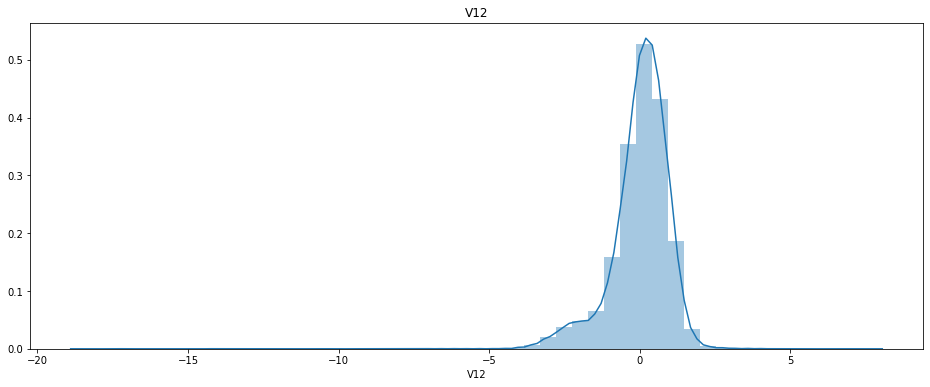

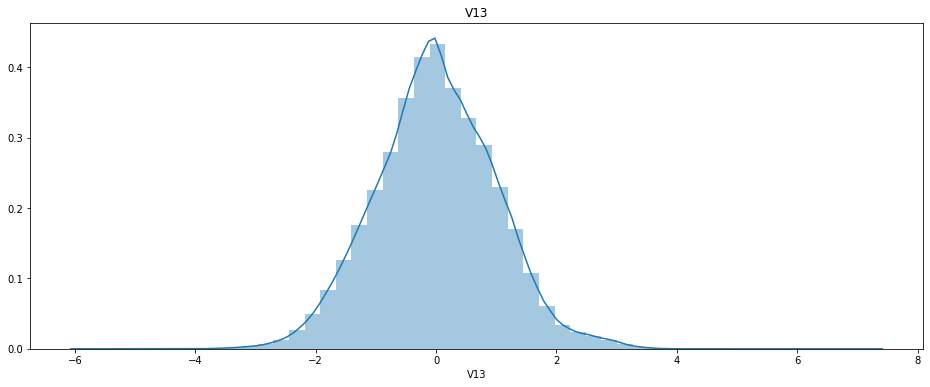

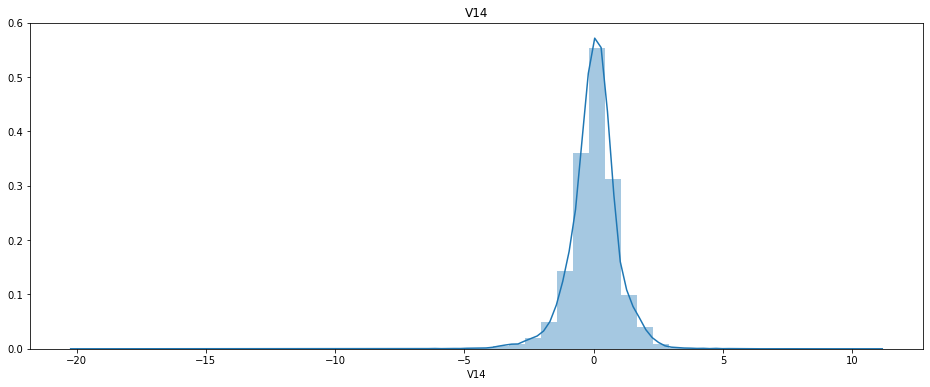

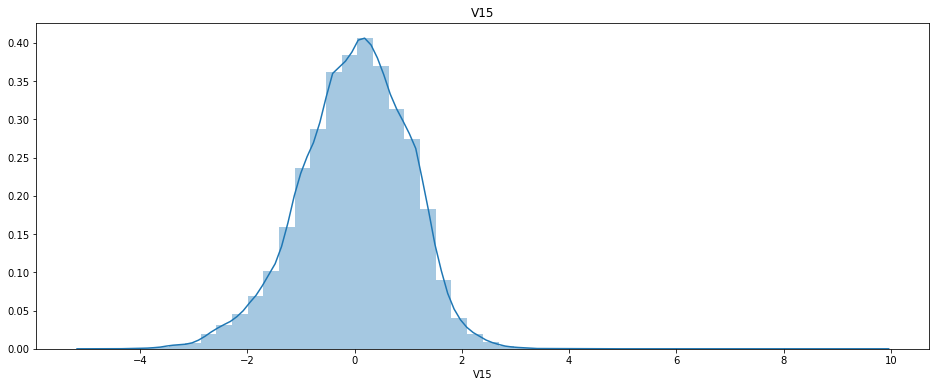

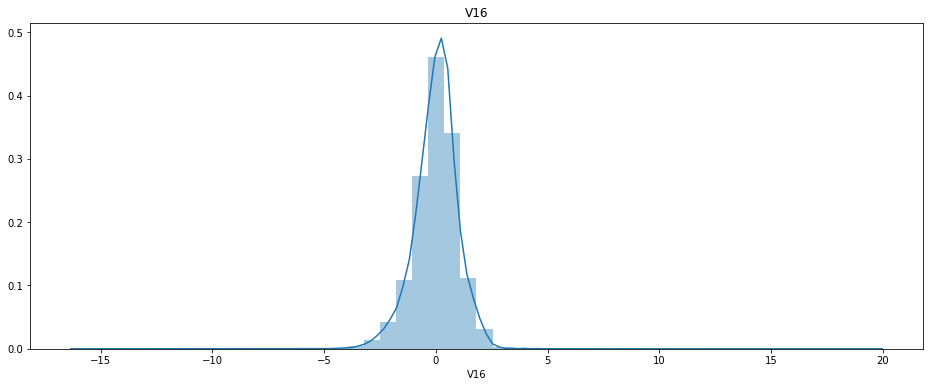

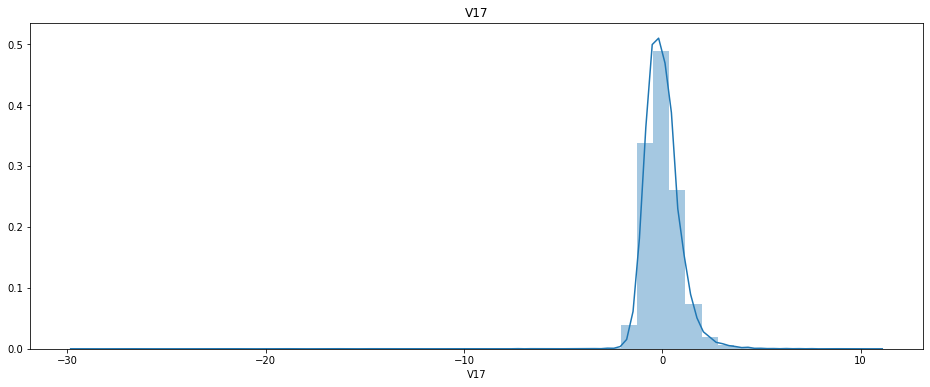

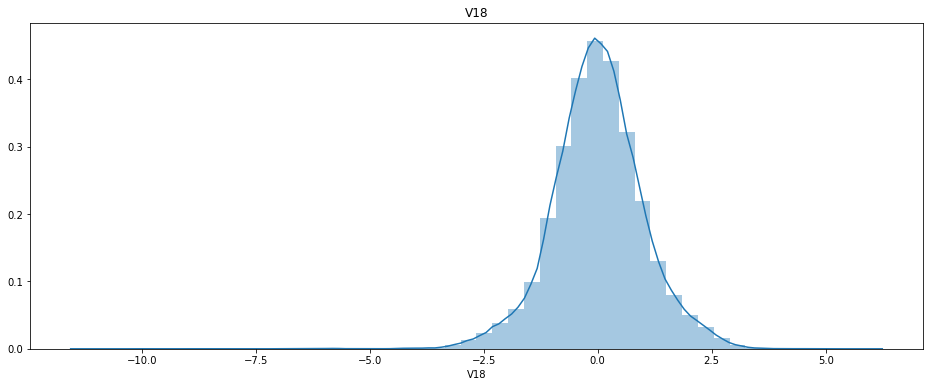

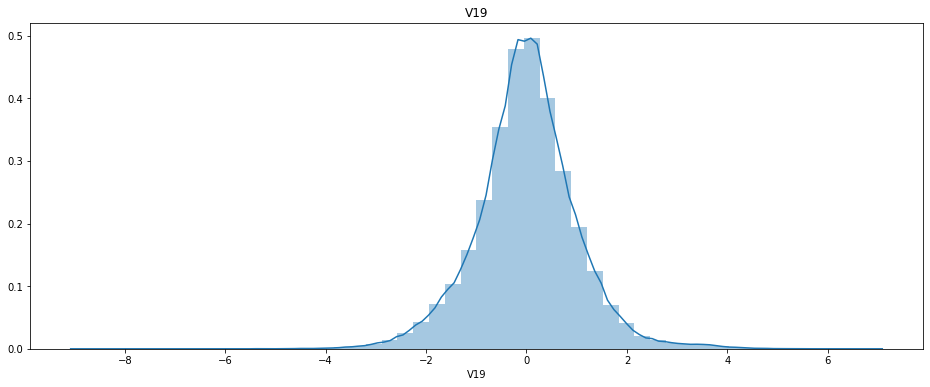

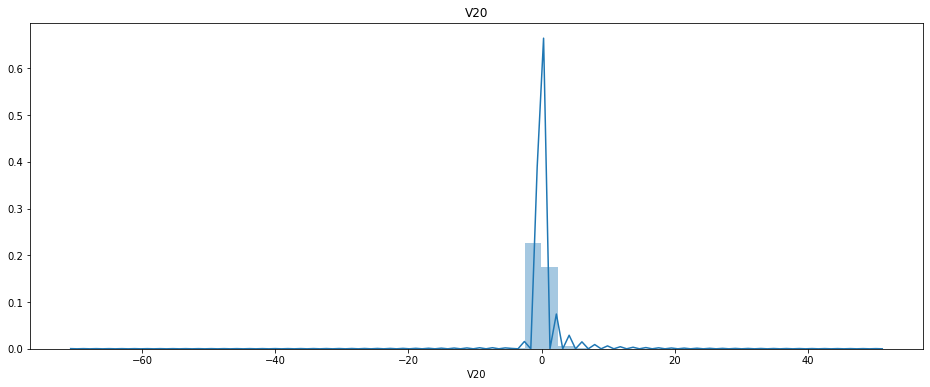

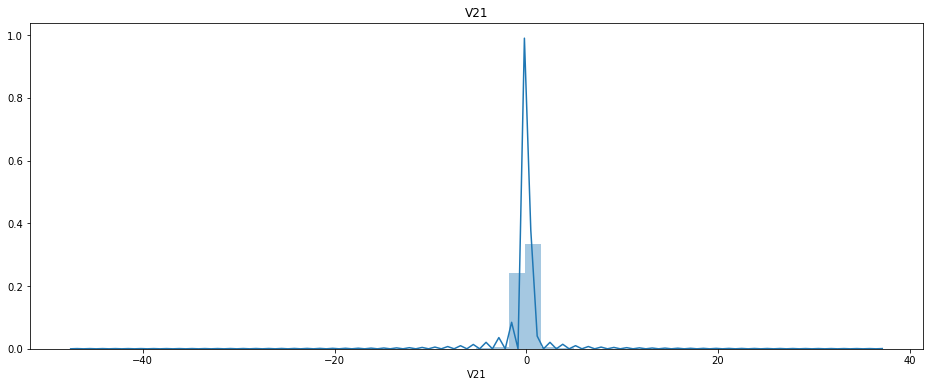

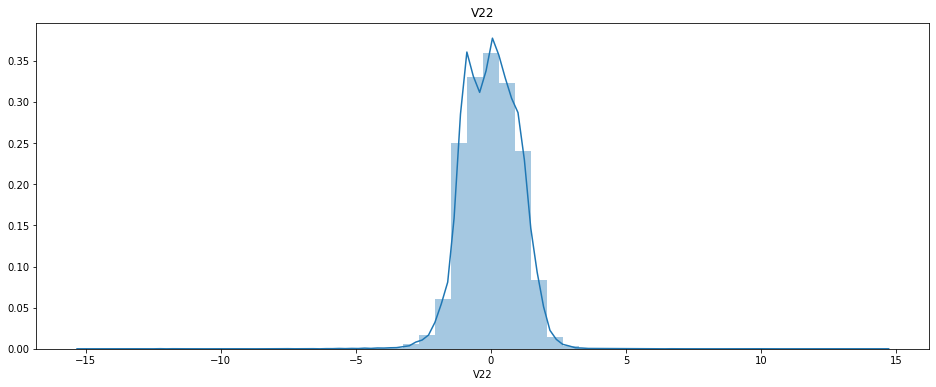

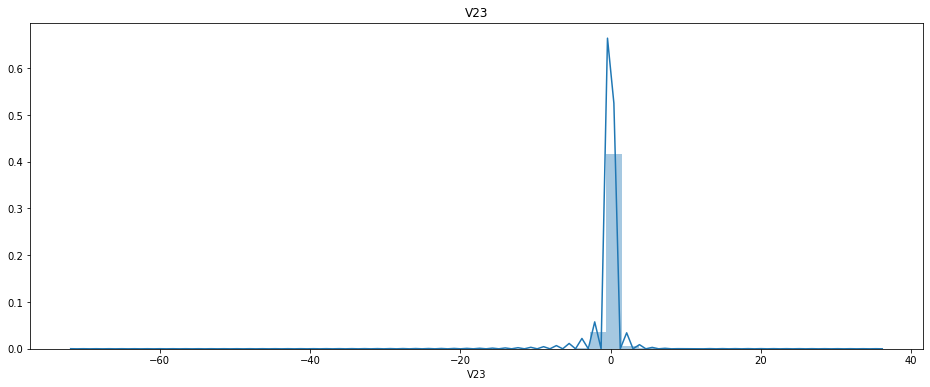

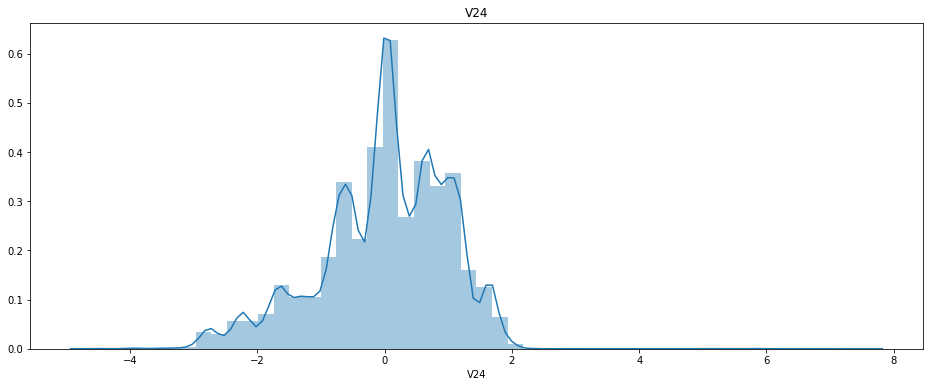

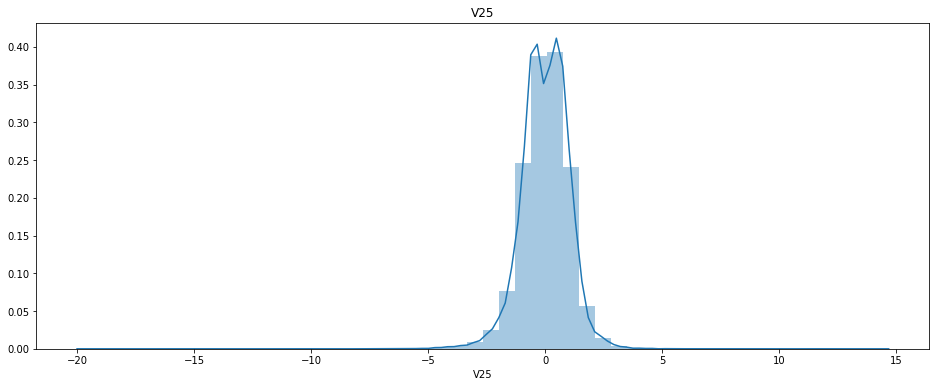

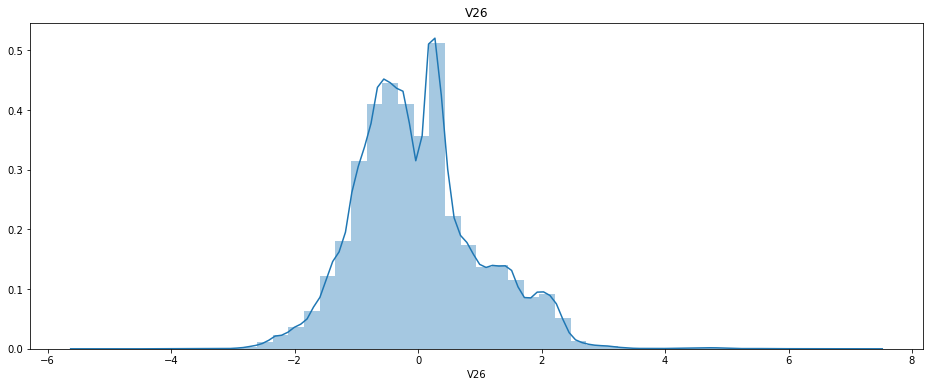

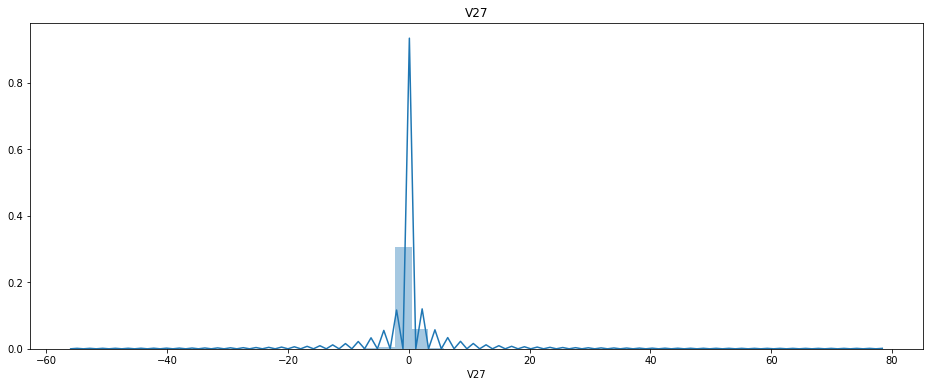

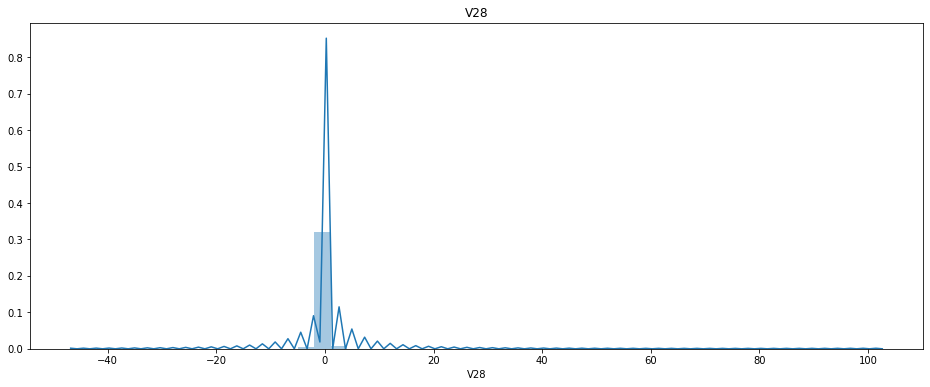

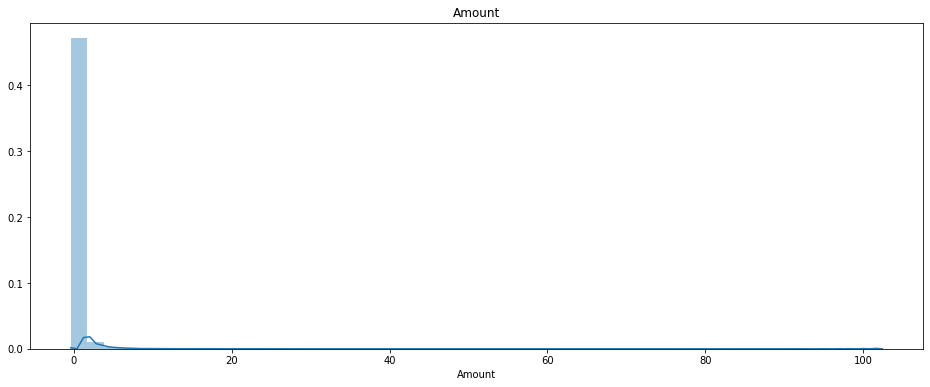

In [9]:
# Creating distribution plots for every feature
for feature in df.columns:
    plt.figure(figsize=(16,6))
    plt.title(feature)
    ax = sns.distplot(df[feature])
    plt.show()

#### 1.2.3 Time and Amount Feature Analysis

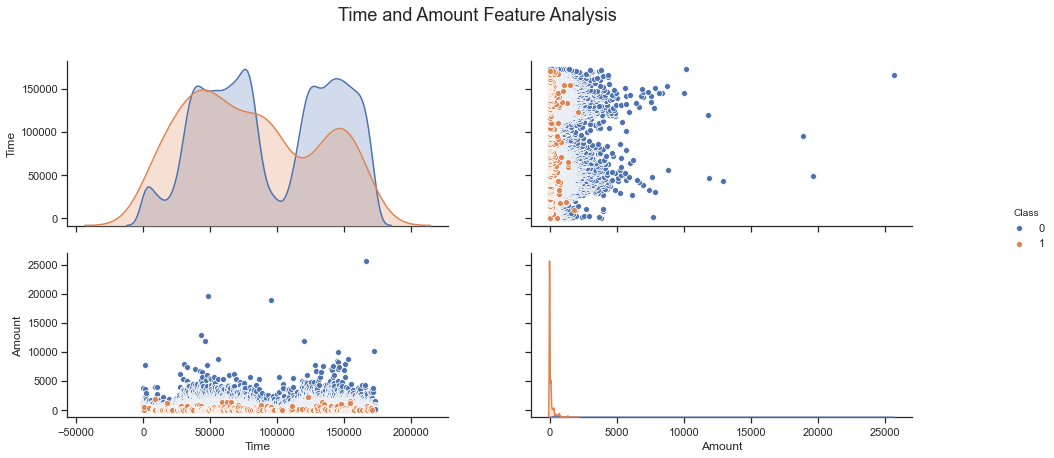

In [10]:
# Time and amount components plot for analysis
cols = ['Time', 'Amount', 'Class']
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data[cols], 
                 hue="Class",
                 x_vars=['Time', 'Amount'],
                 y_vars=['Time', 'Amount'],
                )
g.fig.suptitle("Time and Amount Feature Analysis", fontsize=18, y=1.08)
g.fig.set_size_inches(16,6)

In [11]:
# Descriptive statistics for Time column
data['Time'].describe().to_frame()

,Time
count,284807.000000
mean,94813.859575
std,47488.145955
min,0.000000
25%,54201.500000
50%,84692.000000
75%,139320.500000
max,172792.000000


<AxesSubplot:title={'center':'Time between the last transaction and a new one'}, xlabel='Time [seconds]'>

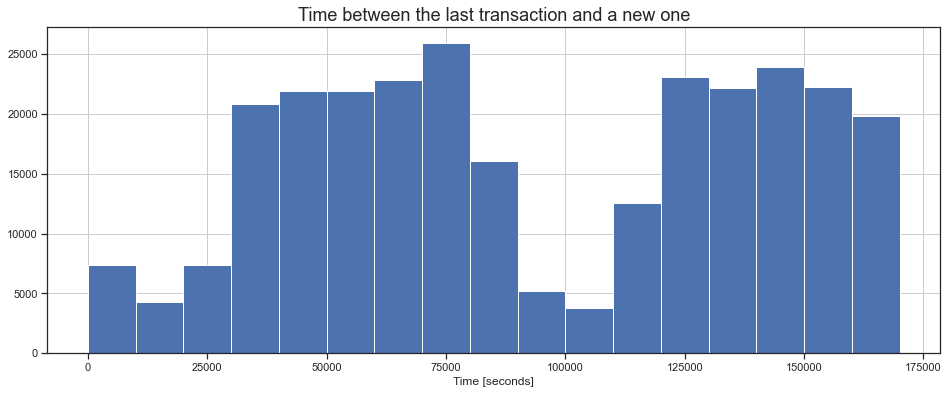

In [12]:
# Time between the last transaction and a new one histogram
plt.title("Time between the last transaction and a new one", size=18)
plt.xlabel("Time [seconds]")
data['Time'].hist(figsize=(16,6), bins=range(0, 180000, 10000))

<AxesSubplot:title={'center':'Time between the last transaction and a new one in fraudulent transactions'}, xlabel='Time [seconds]'>

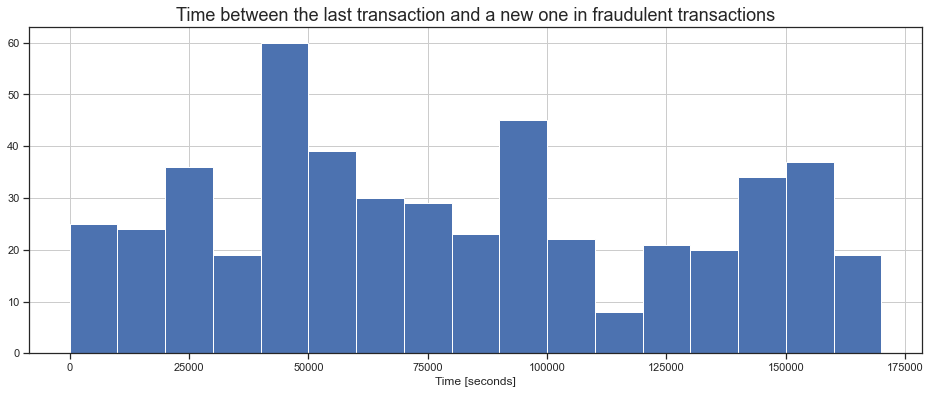

In [13]:
# Time between the last transaction and a new one in fraudulent transactions histogram
plt.title("Time between the last transaction and a new one in fraudulent transactions", size=18)
plt.xlabel("Time [seconds]")
data[data['Class']==1]['Time'].hist(figsize=(16,6), bins=range(0, 180000, 10000))

In [14]:
# Descriptive statistics for Amount column
data['Amount'].describe().to_frame()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


<AxesSubplot:title={'center':'Amount of transaction in non fraudulent cases'}, xlabel='Amount spent[$]'>

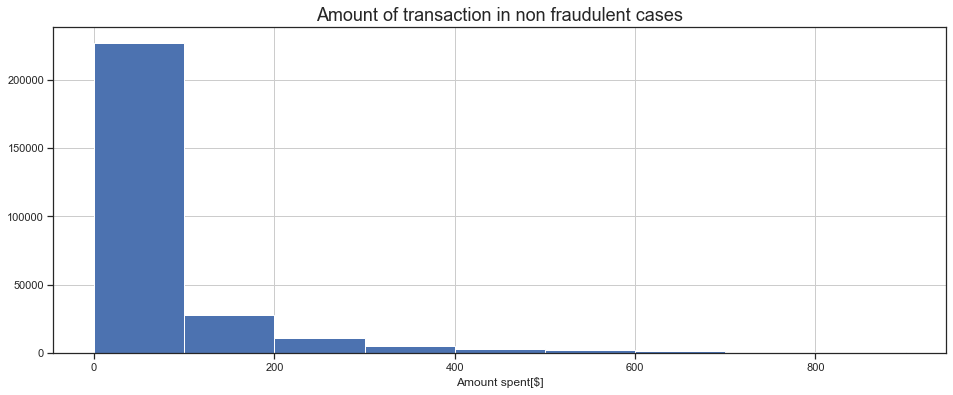

In [15]:
# Amount of transaction in non fraudulent case histogram
plt.title("Amount of transaction in non fraudulent cases", size=18)
plt.xlabel("Amount spent[$]")
data[data['Class']==0]['Amount'].hist(figsize=(16,6), bins= range(0,1000,100))

<AxesSubplot:title={'center':'Amount of transaction in fraudulent cases'}, xlabel='Amount spent [$]'>

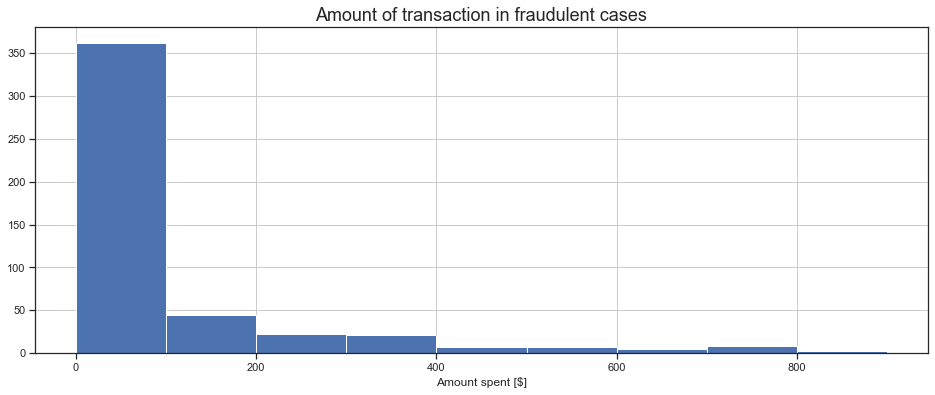

In [16]:
# Amount of transaction in fraudulent case histogram
plt.title("Amount of transaction in fraudulent cases", size=18)
plt.xlabel("Amount spent [$]")
data[data['Class']==1]['Amount'].hist(figsize=(16,6), bins=range(0,1000,100))

The plots shown above are in different y scale**

#### 1.2.4 Most significant features analysis

In [17]:
# Lasso model for finding the most significant features
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.008, random_state=0)) 
feature_sel_model.fit(df, data['Class'])

SelectFromModel(estimator=Lasso(alpha=0.008, random_state=0))

In [18]:
# Most significant columns
df.columns[feature_sel_model.get_support()]

Index(['V3', 'V10', 'V12', 'V14', 'V16', 'V17'], dtype='object')

In [19]:
# List of columns that will be taking into account for the component by component plot
signif_cols = list(df.columns[feature_sel_model.get_support()])
signif_cols.append("Class")

In [20]:
# Descriptive statistics of the most significant variables
data[signif_cols].describe()

,V3,V10,V12,V14,V16,V17,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-8.769071e-15,1.768627e-15,-1.810658e-15,1.479045e-15,1.392007e-15,-7.528491e-16,0.001727
std,1.516255e+00,1.088850e+00,9.992014e-01,9.585956e-01,8.762529e-01,8.493371e-01,0.041527
min,-4.832559e+01,-2.458826e+01,-1.868371e+01,-1.921433e+01,-1.412985e+01,-2.516280e+01,0.000000
25%,-8.903648e-01,-5.354257e-01,-4.055715e-01,-4.255740e-01,-4.680368e-01,-4.837483e-01,0.000000
50%,1.798463e-01,-9.291738e-02,1.400326e-01,5.060132e-02,6.641332e-02,-6.567575e-02,0.000000
75%,1.027196e+00,4.539234e-01,6.182380e-01,4.931498e-01,5.232963e-01,3.996750e-01,0.000000
max,9.382558e+00,2.374514e+01,7.848392e+00,1.052677e+01,1.731511e+01,9.253526e+00,1.000000


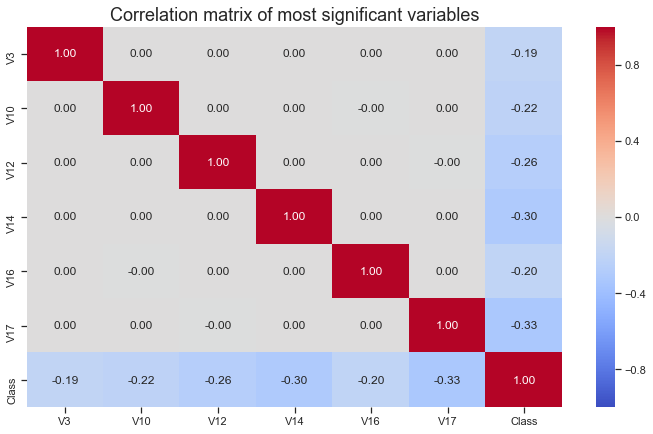

In [21]:
# Correlation matrix
plt.figure(figsize = (12,7))
plt.title("Correlation matrix of most significant variables", size=18)
ax = sns.heatmap(data[signif_cols].corr(), 
            fmt=".2f", vmin=-1, vmax=1, center= 0, 
            annot=True, cmap= 'coolwarm')
ax.set_ylim([len(signif_cols),0])
plt.show()

Text(0.5, 1.08, 'Component by component plot')

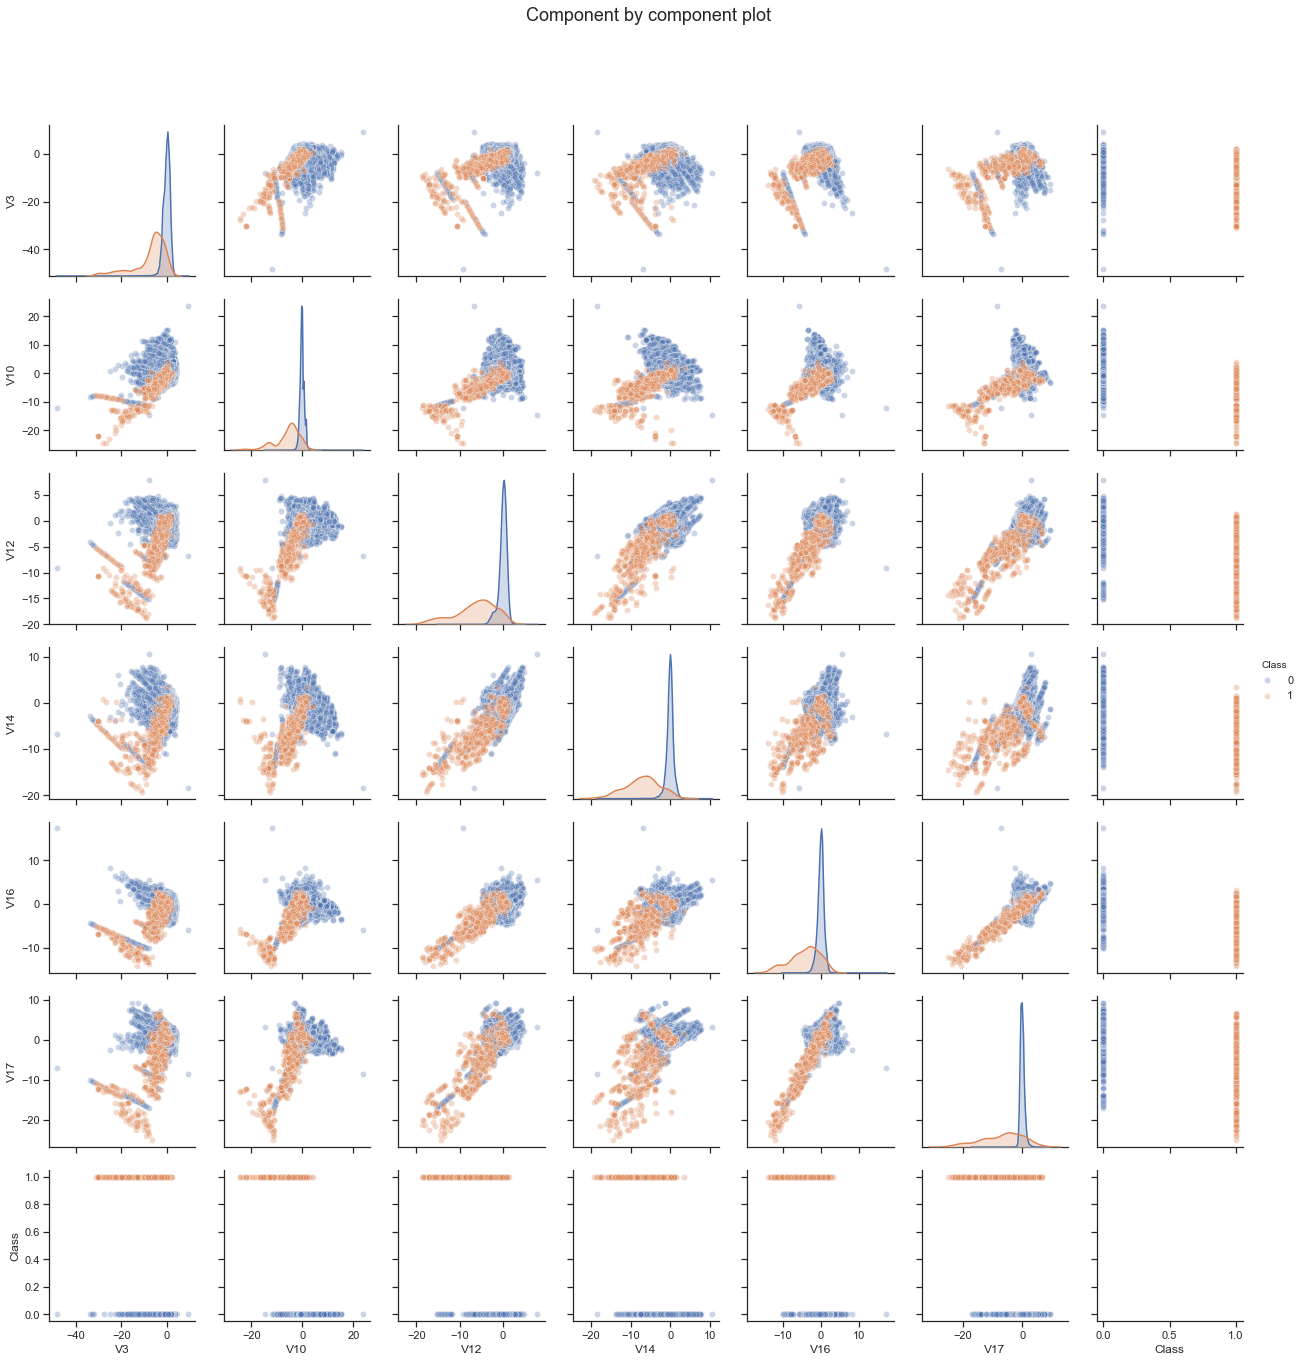

In [22]:
# Component by component plot
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data[signif_cols], hue="Class",  plot_kws={'alpha':0.3})
g.fig.suptitle("Component by component plot", fontsize=18, y=1.08)

### 2. Baseline Model

#### 2.1 Model approximation

Now we have a basic understanding of the data, we will create our first approximation prediction model. First we'll split the data into training and test data.

|         Data split        | Value |
|:--------------------:|:-----:|
| Train |   75%   |
|  Test  |   25%   |
|                      |       |

For now, we'll create a quick model using Logistic Regression as our baseline model since it's only for demonstration purposes. From the component by component plot we can see that a line separation it's not the best fit but it will create a good enough model for classification. A BFGS optimization, a hill-climbing optimization technique, was used.

In [23]:
# The data is split into train (75%) and test data (25%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, data['Class'], 
                                                    test_size = 0.25, 
                                                    random_state=1)

In [24]:
# Model predictor is created
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1, solver='lbfgs')
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

In [25]:
# The model accuracy is evaluated
from sklearn.metrics import accuracy_score

ac = accuracy_score(y_test, y_predict)
print('The correct classification percentange is: {:.3%}'.format(ac))

The correct classification percentange is: 99.916%


#### 2.2 Model evaluation

So the model had a score accuracy of:

|         Model       | Accuracy score |
|:--------------------:|:-----:|
| Logistic Regression |   99.916%   |

This means that from the test dataset, that consists of 71,202 observations, 71,142 of them were classified with the correct label.

</br></br>
<p style="font-weight: bold; text-align:center; font-size:100%">But how good is this model?</p></br></br>

For many cases this is a good classification rate but for our particular case we need to analyze a little bit further. As we saw from the exploratory data analysis 99.8% of the target label was 0 (Not fraudulent transaction). So, what if we create a model that only predicts 0 values. For that we created the "onlyZeros" function that only returns zero values or if we interpret them, only predicts not fraudulent transactions

In [26]:
# Function that only predicts 0 (Not fraudulent transactions)
def onlyZeros(X_test):
    l = len(X_test)    
    return np.zeros(l)

onlyZeros(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [27]:
# Accuracy of the only not fraudulent transactions
y_dummy_pred = onlyZeros(X_test)
ac = accuracy_score(y_test, y_dummy_pred)
print('The correct classification percentange is: {:.3%}'.format(ac))

The correct classification percentange is: 99.844%


If we evaluate this accuracy score we get a 99.844%, this really similar to what we got before:

|         Model       | Accuracy score |
|:--------------------:|:-----:|
| Logistic Regression |   99.916%   |
|  Only Zeros Prediction |   99.844%   |
|                      |       |

So how sure we are that we are actually getting predictions from the model and it's not a model that occasionally predicts a fraud transaction randomly. Also, just by the accuracy we don't know how do the fraud transactions are being predicted, as much as we know, all the fraudulent transaction could be the predictions made wrong. For that, a further analysis is needed, this could be done by the confusion matrix.

Before the explanation of the results of the confusion matrix, there are some statements to make. Recall that the "Class" column defines as "1" the fraudulent transaction and as "0" the not fraudulent transactions. From this, there are four possible outcomes of the model:
- TP - Transactions which are actually fraudulent and the model also able correctly identify them as fraudulent transactions
- TN - Transactions which are actually non fraudulent transactions and model is also predicting them as non fraudulent transactions
- FP - Transactions which are actually non fraudulent transactions but the model is predicting them as fraudulent transactions
- FN - Transactions which are actually fraudulent but the model is predicting them as non fraudulent transactions

</br>
<img src="images/confusion.jpeg" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">Confusion matrix representation</p>

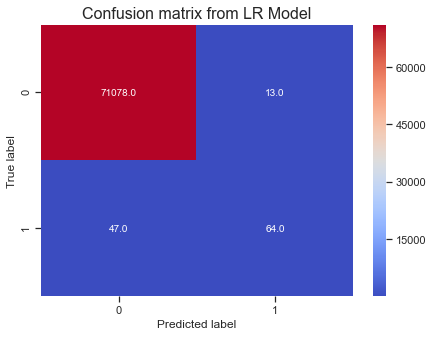

In [28]:
# Plot of the confusion matrix of the baseline model

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(7, 5))
original_matrix = confusion_matrix(y_test, y_predict)
ax = sns.heatmap(original_matrix, 
                 annot=True, fmt=".1f", 
                 annot_kws={'size':10}, 
                 cmap= 'coolwarm'
                )
ax.set_ylim([2,0])
plt.title('Confusion matrix from LR Model', size=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Now we can see that the values obtained from the prediction model were:
- TP = 64 Transactions which are actually fraudulent transactions
- TN = 71,078 Transactions which are actually non fraudulent transactions
- FP = 13 Transactions which are actually non fraudulent transactions but the model is predicting them as fraudulent transactions
- FN = 47 Transactions which are actually fraudulent but the model is predicting them as non fraudulent transactions

For measuring how good the model is, we need a different way of qualifying the model different from the accuracy score. For that we could use:

</br>
<img src="images/recall.png" alt="Figure 1" style="width: 300px;"/>

- Precision represents the percentage of fraudulent transactions predicted by the model that was right. These includes the not fraudulent transactions that were predicted as fraudulent. If we want to reduce the proportion of not fraudulent transactions incorrectly, we need to increase this value.
- Recall represents  the percentage of the actual fraudulent transactions predicted correctly. If we want to reduce the proportion of fraudulent transactions identified as harmless transactions we must increase this measure. 

In other words, Recall is the measure of how well we identified fraudulent transactions. For this project, we'll emphasize in recall score measure because if we had to choose, we would prefer to decline a harmless transactions than accept fraudulent transactions.

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.83      0.58      0.68       111

    accuracy                           1.00     71202
   macro avg       0.92      0.79      0.84     71202
weighted avg       1.00      1.00      1.00     71202



In [30]:
# Recall calculation of the baseline model
from sklearn.metrics import recall_score

sc = recall_score(y_test, y_predict, average=None)
print('The recall for the model is: {:.3%}'.format(sc[1]))

The recall for the model is: 57.658%


The recall for this model is 57.66%, therefore the model is not performing as well as we first thought. This value means that only about 58% of the fraud transactions are being detected correctly, this is not so different from the random guessing percentage (50%) for the fraud transactions.

## 3. Handling Imbalanced Dataset

One of the main problems of the model is the imbalance of the dataset, this is the unequal frequency of labels for training. We have a 99.8% of "No fraudulent" label (0 value in Class column) and 0.2% of "Fraud" labels (1 value in Class column). Keeping it simple, this represents a problem because the model will not learn to predict the least frequent values since we are teaching the computer to only predict "No fraudulent" values, and the "Fraud" label could be interpreted as a non representative value to predict with rare appearances. These low frequency appearances could be detected as outliers by the model or could be detected as random events. Due to this, we need to teach the model that fraudulent transactions are expected occurrences. We can do this by increasing the fraudulent transactions' proportion, otherwise these two classes will be biased towards the majority class.

<img src="images/resampling.png" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">Oversampling and undersampling techniques</p>

<img src="images/smote.png" alt="Figure 1" style="width: 600px;"/><p style="text-align:center;font-size: 11px;">SMOTE technique</p>

There are many techniques used to adjust the class distribution of a dataset, for this project we will implement three different popular techniques in order to compare them and select the best strategy for our problem. These strategies are:
1. Near Miss Undersampling: Select points using euclidean distance from the majority class that are near the minority class.
2. Random Oversampling: A random set of copies of minority class examples is added to the data.
3. SMOTE: SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

First of all, remembering the original dataset size and value proportions:

In [31]:
# Count of every class of the target variable
data['Class'].value_counts().to_frame()

,Class
0,284315
1,492


#### 3.1 Near Miss Undersampling

For the Near Miss Undersampling strategy we will keep all the fraudulent transactions (1 Values), and we will reduce the number of not fraudulent transactions (0 Values) using the Near Miss technique. We will use a sampling strategy of 0.3, this means that 30% of the dataset transaction observations will be fraudulent, making this variable significant enough to avoid bias on the model.

In [32]:
# Strategy No. 1 - Near Miss Undersampling

from imblearn.under_sampling import NearMiss

nm = NearMiss(sampling_strategy=0.3)
X_s1,y_s1=nm.fit_sample(df,data['Class'])

In [33]:
y_s1.value_counts().to_frame()

,Class
0,1640
1,492


#### 3.2 Random Oversampling

For the random oversampling it's hard to over sample the fraudulent transactions (1 Values) up to the not fraudulent transactions, since we are only teaching repeated values, the Machine Learning algorithm will learn to detect fraud transaction only for those exact values of the features, this will cause that our prediction model for further evaluations will only predict a fraudulent transaction when the training values are repeated as the input (Input of fraudulent transactions).

For that reason, the over sampling was made in two steps. First, we well under sample the majority class using a sampling strategy of 0.1, this is, the fraudulent transactions will be the 10% of the majority class, keeping all the fraudulent transactions the same. And after that, we will over sample the minority class in order to have 50/50 dataset.

In [34]:
# Strategy No. 2 - Over Sampling

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

nm = NearMiss(sampling_strategy=0.1)
os =  RandomOverSampler()
X_s2,y_s2 = nm.fit_sample(df,data['Class'])
print (y_s2.value_counts())
X_s2,y_s2 = os.fit_sample(X_s2,y_s2)
print(y_s2.value_counts())

0    4920
1     492
Name: Class, dtype: int64
1    4920
0    4920
Name: Class, dtype: int64


#### 3.3 Random Oversampling

Similarly, for the SMOTE technique there will be performed a similar process to the strategy 2. It will be a undersampling with a sampling strategy of 0.1. But instead of applying a random over sampler, the over sampler tecnique will be SMOTE.

In [35]:
# Strategy No. 3 - SMOTE

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

nm = NearMiss(sampling_strategy=0.1)
smote = SMOTE()
X_s3,y_s3 = nm.fit_sample(df,data['Class'])
print (y_s3.value_counts())
X_s3,y_s3 = smote.fit_sample(X_s3,y_s3)
print(y_s3.value_counts())

0    4920
1     492
Name: Class, dtype: int64
1    4920
0    4920
Name: Class, dtype: int64


#### 3.4 Strategy evaluation

Now, for every strategy made (Near miss undersampling, Random oversampling, SMOTE oversampling) the recall score will be evaluated after creating a model with those datasets. For speeding up the process, the fitted model will be Logistic Regression with 25/75 data split of test/test. Same process as performed before.

In [36]:
# Recall and accuracy evaluation for every strategy
from sklearn.metrics import recall_score

Xs = [X_s1, X_s2, X_s3]
Ys = [y_s1, y_s2, y_s3]
i = 0

for x, y  in zip(Xs, Ys):
    i += 1
    X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.25, 
                                                    random_state=1)    
    lr = LogisticRegression(random_state=1, solver='lbfgs')
    lr.fit(X_train, y_train)
    y_predict = lr.predict(X_test)
    ac = accuracy_score(y_test, y_predict)
    sc = recall_score(y_test, y_predict, average=None)
    print('The correct classification percentange for the {}° model is: {:.3%}'.format(i, ac))
    print('The recall for the {}° model is: {:.3%}'.format(i, sc[1]))

The correct classification percentange for the 1° model is: 96.435%
The recall for the 1° model is: 85.600%
The correct classification percentange for the 2° model is: 96.301%
The recall for the 2° model is: 94.540%
The correct classification percentange for the 3° model is: 95.894%
The recall for the 3° model is: 93.888%


We get all the recall score and accuracy values, these values are shown in a summary below:

|         Strategy        | Fraudulent obs. | Not fraudulent obs. | Accuracy | Recall |
|:-----------------------:|:---------------:|:-------------------:|:--------:|:------:|
| Near Miss Undersampling |       492       |         1640        |  96.44%  | 85.60% |
|   Random Oversampling   |       4920      |         4920        |  96.30%  |  94.54% |
|          SMOTE          |       4920      |         4920        |  95.89%  |  93.88% |
|                         |                 |                     |          |        |

The highest overall accuracy was obtained from using the Near miss undersampling strategy (96.44%) but as we mentioned, a better way of measuring how good is our model for our particular problem is the recall score, and is the lowest for this strategy.
The other two remaining strategies obtained almost the same values for both accuracy and recall score, being the Random OverSampling slightly higher values. However, also as mentioned before, when using duplicates of the data there could be the case that we're overfitting the model and that's the reason we are getting higher values. Hence, we've decided to use the SMOTE technique for further processes since this strategy is actually creating new observations and getting similar results. 

## 4.Model Building

Once we have handled the imbalance of the dataset, we can recreate the prediction model and analyze how does these modifications have changed the fit of our model. We will follow the same process, so again it will be data split of 75/25 for train/test data and the Machine Learning algorithm implemented will be Logistic Regression using a BFGS solver.

In [37]:
# The data is split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_s3, y_s3, 
                                                    test_size = 0.25, 
                                                    random_state=1)

In [38]:
# Logistic Regression model is created from the training data
lr = LogisticRegression(random_state=1, solver='lbfgs')
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

ac = accuracy_score(y_test, y_predict)
sc = recall_score(y_test, y_predict, average=None)
print('The correct classification percentange is: {:.3%}'.format(ac))
print('The recall for the model is: {:.3%}'.format(sc[1]))

The correct classification percentange is: 95.894%
The recall for the model is: 93.888%


The comparison score values from the imbalanced and balanced dataset are shown below:

|         Dataset        | Accuracy | Recall |
|:-----------------------:|:--------:|:------:|
| Imbalanced |  99.916%   | 57.66% | 
|   Balanced (SMOTE)   |  95.89%  |  93.88% |

Now the score values have changed, we can see from the table that accuracy has decreased from 99.91% to 95.89% so it's not a dramatically decrease, this means that for our new model we are labeling correctly whether a transaction is fraudulent or not a 95.89% of the times.

On the other hand, focusing on detecting fraudulent transactions we have a really big increase in Recall score, has grown from 57.66% to 93.88%. In other words, with our new model we are identifying the 93.88% of the fraudulent transactions.

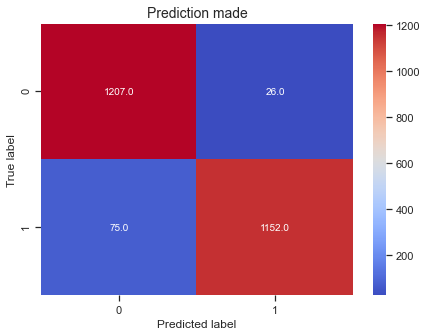

In [39]:
# Confusion matrix of balanced dataset

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(7, 5))
ax = sns.heatmap(confusion_matrix(y_test, y_predict), 
                 annot=True, fmt=".1f", 
                 annot_kws={'size':10}, 
                 cmap= 'coolwarm'
                )
ax.set_ylim([2,0])
plt.title('Prediction made', size=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Analyzing our new confusion matrix we have:

- TP = 1152 Transactions which are actually fraudulent transactions
- TN = 1207 Transactions which are actually non fraudulent transactions
- FP = 26 Transactions which are actually non fraudulent transactions but the model is predicting them as fraudulent transactions
- FN = 75 Transactions which are actually fraudulent but the model is predicting them as non fraudulent transactions

We can see that now we are not only labeling correctly the not fraudulent transactions, we are labeling correctly fraudulent and not fraudulent transactions.


<p style="font-weight: bold; text-align:center; font-size:100%">Now we have a nice fitted model but what if we change the Machine Learning algorithm?</p></br></br>

Sections ago we mentioned that probably a range division of parameters will work better for our classification problem. The Decision Tree Classifier identifies ranges of values that slit the data in order to group the same class (true labeled values) data into the same data classification (Fraudulent/Not fraudulent). The key idea is to use a decision tree to partition the data space into cluster (or dense) regions and empty (or sparse) regions. A Random Forest Classifier uses a bunch of Decision Tree Classifiers and decides the category based on the majority prediction from all the trees. We'll perform this classification type below:

In [40]:
# Random Forest Classifier model is created from the training data

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)

ac = accuracy_score(y_test, y_predict)
sc = recall_score(y_test, y_predict, average=None)
print('The correct classification percentange for the RFC model is: {:.3%}'.format(ac))
print('The recall for the RFC model is: {:.3%}'.format(sc[1]))

The correct classification percentange for the RFC model is: 99.268%
The recall for the RFC model is: 99.185%


Consequently, we have modified the score values again. The values we have obtained from the different models are:

|         Dataset        | Accuracy | Recall |
|:-----------------------:|:--------:|:------:|
| Logistic Regression (Imbalanced) |  99.92%   | 57.66% | 
|   Logistic Regression (Balanced)  |  95.89%  |  93.88% |
|   Random Forest Classifier (Balanced)  |  99.27%  |  99.19% |

The Random Forest Classifier improves the model by increasing accuracy and recall score from 95.89% and 93.88% to 99.27% and 99.19% respectively, reaching an accuracy almost as high as the first model and getting to the highest recall we've ever gotten.

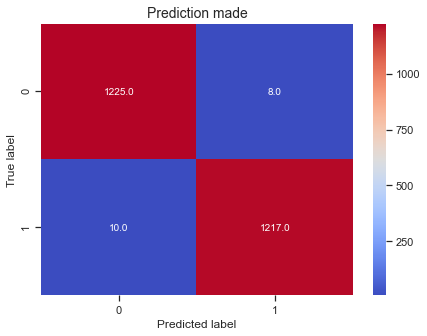

In [41]:
# Plot of the confusion matrix of the Random Forest Classifier model

from sklearn.metrics import confusion_matrix

plt.figure(figsize=(7, 5))
ax = sns.heatmap(confusion_matrix(y_test, y_predict), 
                 annot=True, fmt=".1f", 
                 annot_kws={'size':10}, 
                 cmap= 'coolwarm'
                )
ax.set_ylim([2,0])
plt.title('Prediction made', size=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [178]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1233
           1       0.99      0.99      0.99      1227

    accuracy                           0.99      2460
   macro avg       0.99      0.99      0.99      2460
weighted avg       0.99      0.99      0.99      2460



From this new model we have that:

- TP = 1217 Transactions which are actually fraudulent transactions
- TN = 1225 Transactions which are actually non fraudulent transactions
- FP = 8 Transactions which are actually non fraudulent transactions but the model is predicting them as fraudulent transactions
- FN = 10 Transactions which are actually fraudulent but the model is predicting them as non fraudulent transactions

Also, we labeled correctly 99.26% of the transactions and we identified correctly 99.19% of the fraudulent transactions.

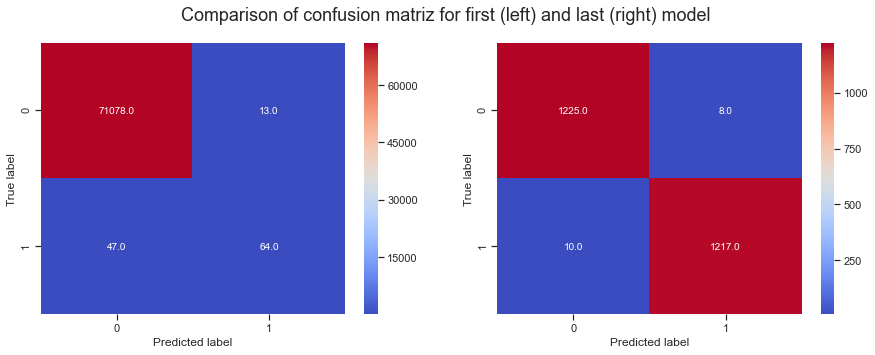

In [63]:
# Comparison of confusion matriz for first and last model

fig, ax =plt.subplots(1,2, figsize=[15,5])
sns.heatmap(original_matrix, 
                 annot=True, fmt=".1f", 
                 annot_kws={'size':10}, 
                 cmap= 'coolwarm',
                 ax=ax[0]  
                )
sns.heatmap(confusion_matrix(y_test, y_predict), 
                 annot=True, fmt=".1f", 
                 annot_kws={'size':10}, 
                 cmap= 'coolwarm',
                 ax=ax[1]  
                )
for ax in ax:
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

fig.suptitle('Comparison of confusion matriz for first (left) and last (right) model', fontsize=18)
fig.show()

A final comparison is made between the first and last model we made to show how the model has improved and how the proportions of fraudulent transactions detected has changed. One important difference from this model is the number of transactions classified, this number was modified to change the proportion of values of the dataset. There is no exact number of observations defined to work with after the oversampling/undersampling process, the chosen number was kept the same for processing speed reasons, we encourage you to experiment with other number of transactions.

## 5. ROC AUC Curve

Once we have our final model, we can get to design the details from the model. One important aspect is that, despite in most cases we are able to classify transactions successfully, we're dealing with more FN (False Negatives) than FP (False Positives). Since we mentioned we preferred FP, we would like to modify the model towards this point. This can be done with the ROC AUC Curve.

By default, every machine learning algorithm uses a probability threshold of 0.5 to classify between positive and negative classes. If we can tune this probability threshold to some other values which increases the true positive rate then we will be able to increase the recall for fraudulent transactions.

To do that we need to compute the AUC score. The AUC score signifies that the probability value of a random observation from the positive class (fraudulent transactions) is larger than the probability value of another random observation from the negative class (non fraudulent transactions). AUC value of 1 means all the predicted positive (fraudulent) transactions have higher probabilities of being fraudulent than the non fraudulent transactions, which is an ideal case. 

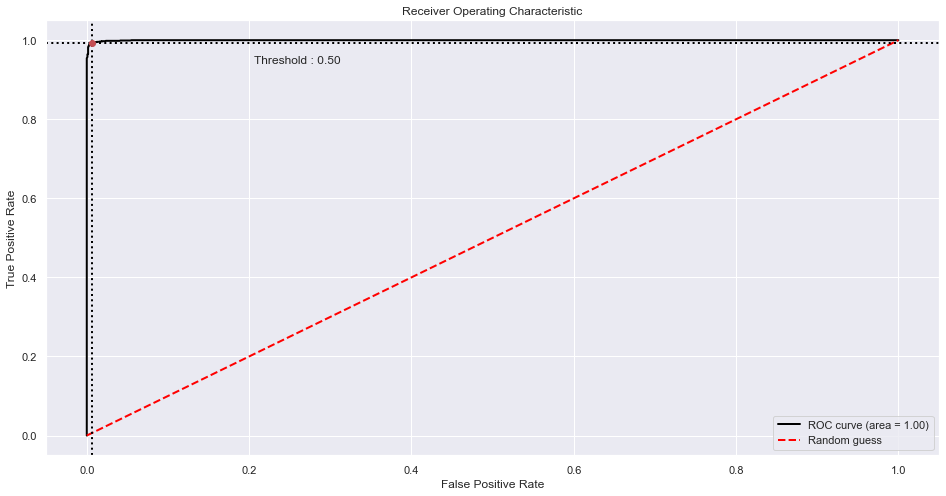

In [64]:
from plot_metric.functions import BinaryClassification

bc = BinaryClassification(y_test, rf.predict_proba(X_test)[:,1], labels=[0, 1])
plt.figure(figsize=(16,8))
bc.plot_roc_curve()
plt.show()

From this plot we can see that there is a True Positive Rate - False Positive Rate trade off, that is directly related to the False Positives and False Negatives classified in our model. This trade off is defined by the threshold, so we can change the threshold in order to change these values. In other words:

- As we decrease the threshold, the False Negative value will decrease but the False Positive value will increase.
- As we increase the threshold, the False Negative value will increase meanwhile the False Positive value will decrease.

For our specific problem, we want to decrease the False Negative value so we need to decrease the threshold but we know this will increase the False Positive value.

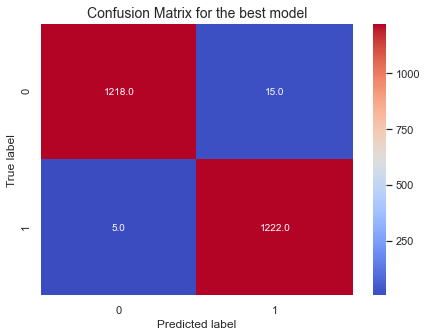

In [85]:
# Plot of the confusion matrix of the Random Forest Classifier model with the threshold of 0.4

y_pred_prob = rf.predict_proba(X_test)[:, 1]

y_pred_labels = (y_pred_prob >= 0.4)

plt.figure(figsize=(7, 5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_labels), 
                 annot=True, fmt=".1f", 
                 annot_kws={'size':10}, 
                 cmap= 'coolwarm'
                )
ax.set_ylim([2,0])
plt.title('Confusion Matrix for the best model', size=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [76]:
# Recall and accuracy calculation from the best model

ac = accuracy_score(y_test, y_pred_labels)
sc = recall_score(y_test, y_pred_labels, average=None)
print('The correct classification percentange for the RFC model is: {:.3%}'.format(ac))
print('The recall for the RFC model is: {:.3%}'.format(sc[1]))

The correct classification percentange for the RFC model is: 99.187%
The recall for the RFC model is: 99.593%


Decreasing the threshold to 0.4 instead of 0.5, we are able to decrease the False Negative value by 1/2, the recall score was improved too. Also, the False Positive value is almost the double the last one, but this is a better solution for our problem. 

**We conclude that this is the optimal model for the solution of this particular problem of detecting fraud transactions**

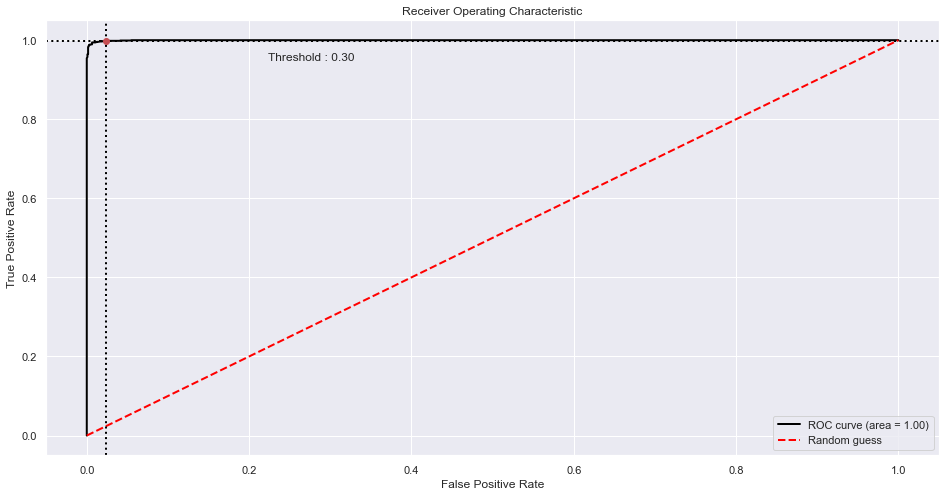

In [77]:
bc = BinaryClassification(y_test, rf.predict_proba(X_test)[:,1], threshold=0.3,labels=[0, 1])
plt.figure(figsize=(16,8))
bc.plot_roc_curve()
plt.show()

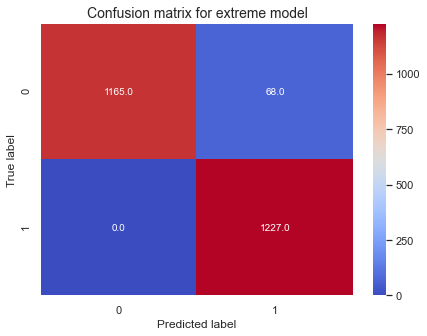

In [86]:
# Plot of the confusion matrix of the Random Forest Classifier model with threshold of 0.18

y_pred_prob = rf.predict_proba(X_test)[:, 1]

y_pred_labels = (y_pred_prob >= 0.18)

plt.figure(figsize=(7, 5))
ax = sns.heatmap(confusion_matrix(y_test, y_pred_labels), 
                 annot=True, fmt=".1f", 
                 annot_kws={'size':10}, 
                 cmap= 'coolwarm'
                )
ax.set_ylim([2,0])
plt.title('Confusion matrix for extreme model', size=14)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Finally, we also propose an extreme solution for fraud detection. We can modify the threshold in order to completely be able to eliminate False Negatives (Fraudulent transactions that were predicted as harmless transactions) by decreasing even more the threshold